## __Text mining y Procesamiento de Lenguaje Natural (NLP)__

__Profesor__: Anthony D. Cho

__Asunto__: Control 1

***

__Instrucciones:__ Al finalizar el control, enviar al correo anthony.cho@umayor.cl

El control consta de 7 preguntas, cada uno tiene una ponderación de 2 puntos con un total de 14 puntos.

__Nombre y apellido__: Joaquin Gutierrez

__Dependencias__

```python
    python -m pip install nltk spacy
    python -m spacy download en_core_web_sm
    python -m spacy download es_core_news_sm
    
```

### Librerias

In [1]:
from pandas import set_option, Series
from spacy import load
from nltk.stem import SnowballStemmer  
from spacy.lang.es.stop_words import STOP_WORDS
from string import punctuation

#set_option('display.max_colwidth', None)
set_option('display.max_rows', None)

## Updated Stopwords
STOP_WORDS.add('\n\n')

## Updated punctuation
punctuation = punctuation + '¿'

nlp = load('es_core_news_sm')    # Language model
stemmer = SnowballStemmer('spanish')    ## Stemmer model

# Parte 1

1- ¿Cuáles son los tipos de ambiguedades presentes en el NLP?

Son 4 tipos de ambiguedades y estos son:
* Léxico        
* Sintático         
* Semántico     
* Pragmática        

2- La frase "Juan le dijo a Pablo que podía decidir lo que quisiera." presenta algun tipo de ambigüedad?. En caso afirmativo, indique de qué tipo de ambigüedad pertenece.

Existe una ambiguedad del tipo pragmático, ya que la oracion no especifica quien puede "decidir lo que quisiera" y hay dos interpretaciones posibles:
* Intrepretacion 1: Juan puede decidir lo que quisiera.
* Interpretacion 2: Pablo puede decidir lo que quisiera.

3- ¿Cuál es la diferencia entre stemming y lemmatización?

La lematizacion es el proceso de convertir una palabra a su forma base. como por ejemplo "corriendo" a "correr". o "corre" a "correr".
El stemming es el proceso de reducir una palabra a su raíz. como por ejemplo "corriendo" a "corr". o "corre" a "corr".

# Parte 2

In [2]:
## Cargar texto
filename = 'Control_1_data.txt'
file = open(filename, 'r', encoding='utf-8')
texto = file.read()
file.close()

## Mostrar texto
print(texto)

¿Vas a comprar una computadora y ni siquiera has pensado en el procesador? Si no lo sabías, se trata de una elemento tanto o más importante que la misma marca del equipo. Y menos que estés por comprarte una Mac, deberás decidir entre AMD vs. Intel.

¿Cuál es la diferencia, realmente? ¿Cuáles son las ventajas y desventajas de cada uno de estos procesadores? Lo analizamos a fondo.

AMD superó a los procesadores de décima generación de Intel con sus Ryzen 5000, tomando el liderato en rendimiento en videojuegos y en productividad. Sin embargo, Intel se está acercando con el lanzamiento de sus procesadores Rocket Lake de onceava generación, y está ofreciendo mejores precios que AMD.

En el universo de las laptops, AMD ofrece sus chips móviles Ryzen 5000, pero estos no aparecen en tantas máquinas como los procesadores Tiger Lake de Intel. Cada nuevo lanzamiento de productos marca un cambio en el balance entre AMD e Intel. A continuación, te contamos cómo va esta rivalidad en 2021.

Intel y A

In [3]:
## Aplicación del modelo de lenguaje al texto
documento = nlp(texto)

## Extracción de tokens y normalizado
tokens = [word.text.lower() for word in documento]

In [4]:
len(tokens)

738

1- Elimine las puntuaciones de la lista de tokens, la lista resultante lo almacena en la variable **tokens_1**

In [5]:
tokens_1 = []
for token in tokens:
    if (token not in punctuation) and (len(token)>0):
        tokens_1.append(token)

In [6]:
print(tokens_1)

['vas', 'a', 'comprar', 'una', 'computadora', 'y', 'ni', 'siquiera', 'has', 'pensado', 'en', 'el', 'procesador', 'si', 'no', 'lo', 'sabías', 'se', 'trata', 'de', 'una', 'elemento', 'tanto', 'o', 'más', 'importante', 'que', 'la', 'misma', 'marca', 'del', 'equipo', 'y', 'menos', 'que', 'estés', 'por', 'comprarte', 'una', 'mac', 'deberás', 'decidir', 'entre', 'amd', 'vs', 'intel', '\n\n', 'cuál', 'es', 'la', 'diferencia', 'realmente', 'cuáles', 'son', 'las', 'ventajas', 'y', 'desventajas', 'de', 'cada', 'uno', 'de', 'estos', 'procesadores', 'lo', 'analizamos', 'a', 'fondo', '\n\n', 'amd', 'superó', 'a', 'los', 'procesadores', 'de', 'décima', 'generación', 'de', 'intel', 'con', 'sus', 'ryzen', '5000', 'tomando', 'el', 'liderato', 'en', 'rendimiento', 'en', 'videojuegos', 'y', 'en', 'productividad', 'sin', 'embargo', 'intel', 'se', 'está', 'acercando', 'con', 'el', 'lanzamiento', 'de', 'sus', 'procesadores', 'rocket', 'lake', 'de', 'onceava', 'generación', 'y', 'está', 'ofreciendo', 'mejore

In [7]:
len(tokens_1)

661

2- Elimine los stopwords de la lista tokens_1 generando una nueva lista llamada **tokens_2**

In [8]:
tokens_2 = []
for token in tokens_1:
    if (token not in STOP_WORDS) and (len(token)>0):
        tokens_2.append(token)

In [9]:
len(tokens_2)

301

In [10]:
print(tokens_2)

['vas', 'comprar', 'computadora', 'siquiera', 'has', 'pensado', 'procesador', 'sabías', 'elemento', 'importante', 'marca', 'equipo', 'estés', 'comprarte', 'mac', 'deberás', 'decidir', 'amd', 'vs', 'intel', 'diferencia', 'realmente', 'ventajas', 'desventajas', 'procesadores', 'analizamos', 'fondo', 'amd', 'superó', 'procesadores', 'décima', 'generación', 'intel', 'ryzen', '5000', 'tomando', 'liderato', 'rendimiento', 'videojuegos', 'productividad', 'intel', 'acercando', 'lanzamiento', 'procesadores', 'rocket', 'lake', 'onceava', 'generación', 'ofreciendo', 'mejores', 'precios', 'amd', 'universo', 'laptops', 'amd', 'ofrece', 'chips', 'móviles', 'ryzen', '5000', 'aparecen', 'tantas', 'máquinas', 'procesadores', 'tiger', 'lake', 'intel', 'lanzamiento', 'productos', 'marca', 'cambio', 'balance', 'amd', 'intel', 'continuación', 'contamos', 'rivalidad', '2021', 'intel', 'amd', 'excelentes', 'procesadores', 'juegos', 'tareas', 'productividad', 'edición', 'transcodificación', 'videos', 'especia

3- Aplicar stemmer a la lista **tokens_2** generando la lista **tokens_stemm**

__Tips__: puedes usar stemmer.stem(word)

In [11]:
tokens_stemm = []
for token in tokens_2:
    tokens_stemm.append(stemmer.stem(token))

print(tokens_stemm)

['vas', 'compr', 'comput', 'siqu', 'has', 'pens', 'proces', 'sab', 'element', 'import', 'marc', 'equip', 'estes', 'comprart', 'mac', 'deb', 'decid', 'amd', 'vs', 'intel', 'diferent', 'realment', 'ventaj', 'desventaj', 'proces', 'analiz', 'fond', 'amd', 'super', 'proces', 'decim', 'gener', 'intel', 'ryzen', '5000', 'tom', 'liderat', 'rendimient', 'videojueg', 'product', 'intel', 'acerc', 'lanzamient', 'proces', 'rocket', 'lak', 'onceav', 'gener', 'ofrec', 'mejor', 'preci', 'amd', 'univers', 'laptops', 'amd', 'ofrec', 'chips', 'movil', 'ryzen', '5000', 'aparec', 'tant', 'maquin', 'proces', 'tig', 'lak', 'intel', 'lanzamient', 'product', 'marc', 'cambi', 'balanc', 'amd', 'intel', 'continu', 'cont', 'rival', '2021', 'intel', 'amd', 'excelent', 'proces', 'jueg', 'tar', 'product', 'edicion', 'transcodif', 'vide', 'especial', 'mejor', 'proces', 'amd', 'ryzen', '9', '5900x', '5950x', 'super', 'proces', 'intel', '12', '16', 'nucle', 'respect', 'proces', 'intel', 'actual', 'cor', 'i9-10900', 'k'

4-Crear un tabla de frecuencia de la lista **tokens_stemm** y por último, imprimir la tabla ordenada de manera descendente.

In [12]:
from pandas import DataFrame, set_option
from nltk import FreqDist

set_option('display.max_colwidth', None)
set_option('display.max_rows', None)

## Crear tabla de frecuencia
tabla_frecuencia = FreqDist(tokens_stemm)

## Ordenar tabla de frecuencia
tabla_frecuencia = DataFrame(sorted(tabla_frecuencia.items(), key=lambda x: x[1], reverse=True), columns=['Palabra', 'Frecuencia'])

## Mostrar tabla de frecuencia
print(tabla_frecuencia)



           Palabra  Frecuencia
0            intel          16
1              amd          14
2           proces          13
3                k           9
4            ofrec           8
5            gener           6
6            ryzen           6
7             5000           4
8          product           4
9           opcion           4
10          comput           3
11             deb           3
12             lak           3
13           preci           3
14            2021           3
15            jueg           3
16           nucle           3
17           11900           3
18            chip           3
19          trabaj           3
20           11600           3
21           compr           2
22            marc           2
23           equip           2
24           super           2
25      rendimient           2
26      lanzamient           2
27          onceav           2
28           mejor           2
29           cambi           2
30              12           2
31      

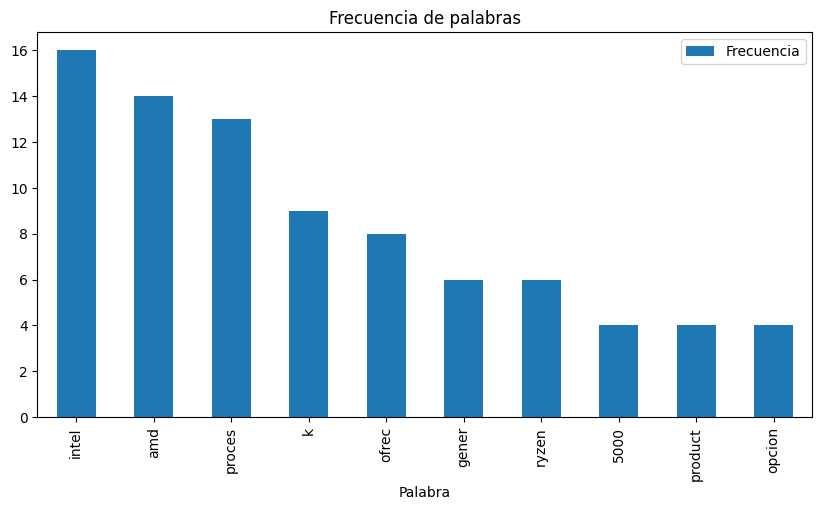

In [13]:
#Graficar la tabla de frecuencias con los primeros 10 valores
import matplotlib.pyplot as plt

tabla_frecuencia[:10].plot(kind='bar', x='Palabra', y='Frecuencia', figsize=(10,5), title='Frecuencia de palabras')
plt.show()